In [2]:
import pandas as pd
import numpy as np
# import nltk

In [3]:
emails = pd.read_csv("Emails.csv")

In [4]:
# Assuming 'emails' is your DataFrame
tables = emails.groupby('SenderPersonId').size().reset_index(name='RowCount')
tables.columns = ['SenderPersonId', 'RowCount']

print(tables)

     SenderPersonId  RowCount
0               1.0         1
1               2.0         1
2               3.0         1
3               5.0         1
4               6.0         1
..              ...       ...
160           219.0         2
161           220.0         5
162           222.0         1
163           225.0         7
164           226.0         1

[165 rows x 2 columns]


/tmp/ipykernel_204/1545895148.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_senders['PersonId'] = top_senders['PersonId'].astype(str)


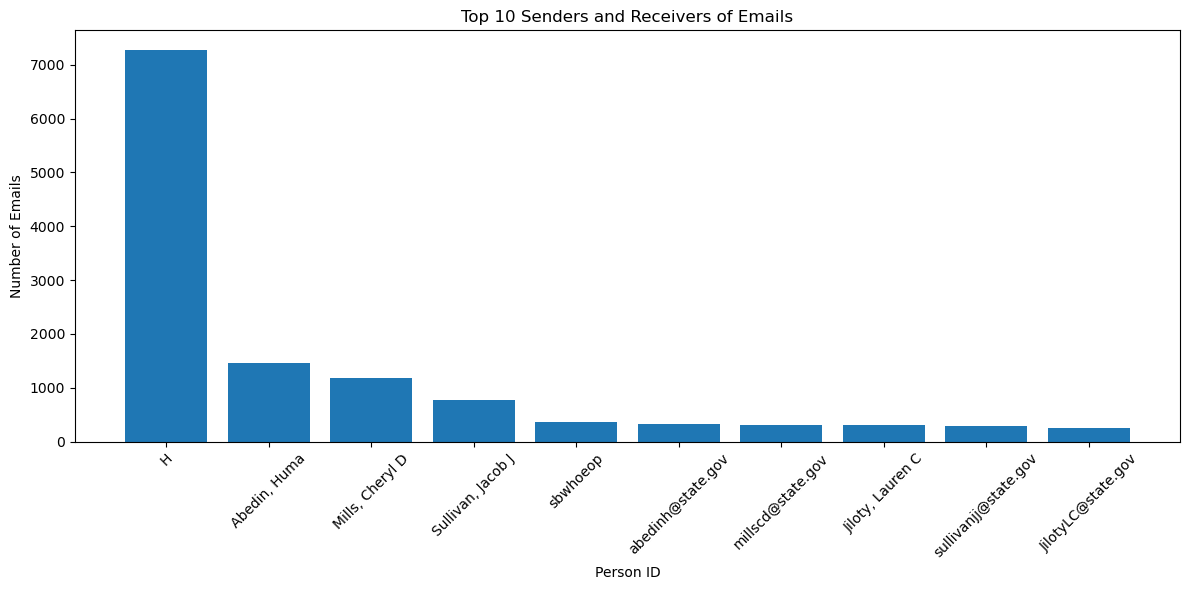

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
emails = pd.read_csv("Emails.csv")

# Get the count of emails sent by each sender
senders_counts = emails.groupby('MetadataFrom').size().reset_index(name='EmailsSent')
# Get the count of emails received by each receiver
receivers_counts = emails.groupby('MetadataTo').size().reset_index(name='EmailsReceived')

# Merge the sender and receiver counts
counts = pd.merge(senders_counts, receivers_counts, how='outer', left_on='MetadataFrom', right_on='MetadataTo')
counts = counts.rename(columns={'MetadataFrom': 'SenderID', 'MetadataTo': 'PersonId'})

# Fill missing values with 0
counts = counts.fillna(0)

# Sum the counts to get the total for each person
counts['Total'] = counts['EmailsSent'] + counts['EmailsReceived']

# Sort the data by the total count
counts = counts.sort_values(by='Total', ascending=False)

# Get the top 10 senders and receivers
top_senders = counts.head(10)

# Convert PersonId to string
top_senders['PersonId'] = top_senders['PersonId'].astype(str)

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(top_senders['PersonId'], top_senders['Total'])
plt.xlabel('Person ID')
plt.ylabel('Number of Emails')
plt.title('Top 10 Senders and Receivers of Emails')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


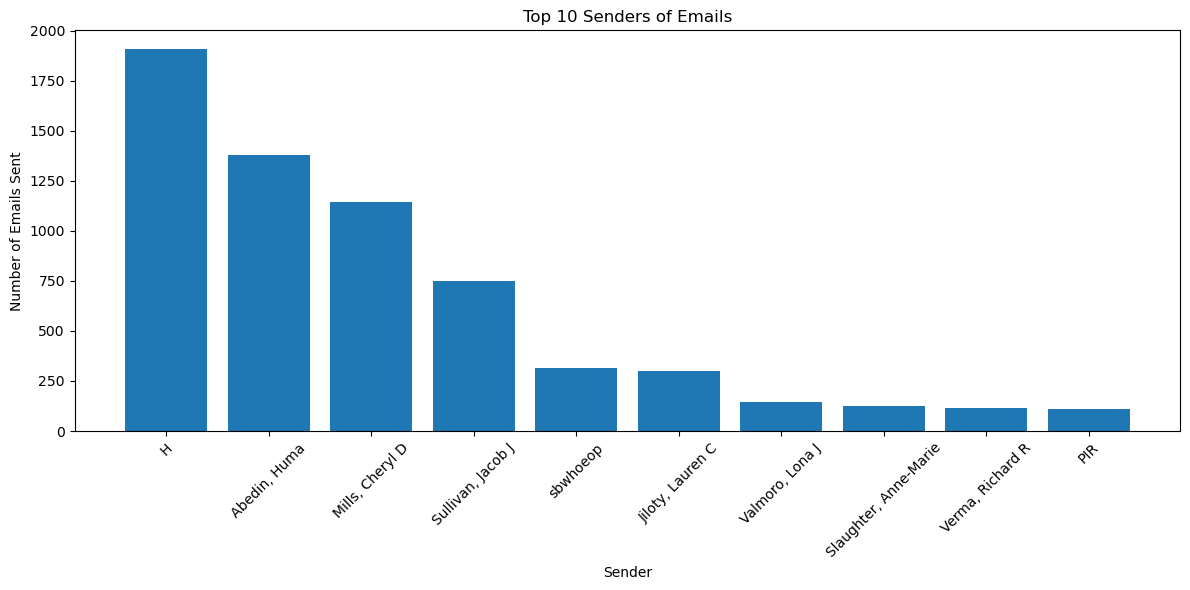

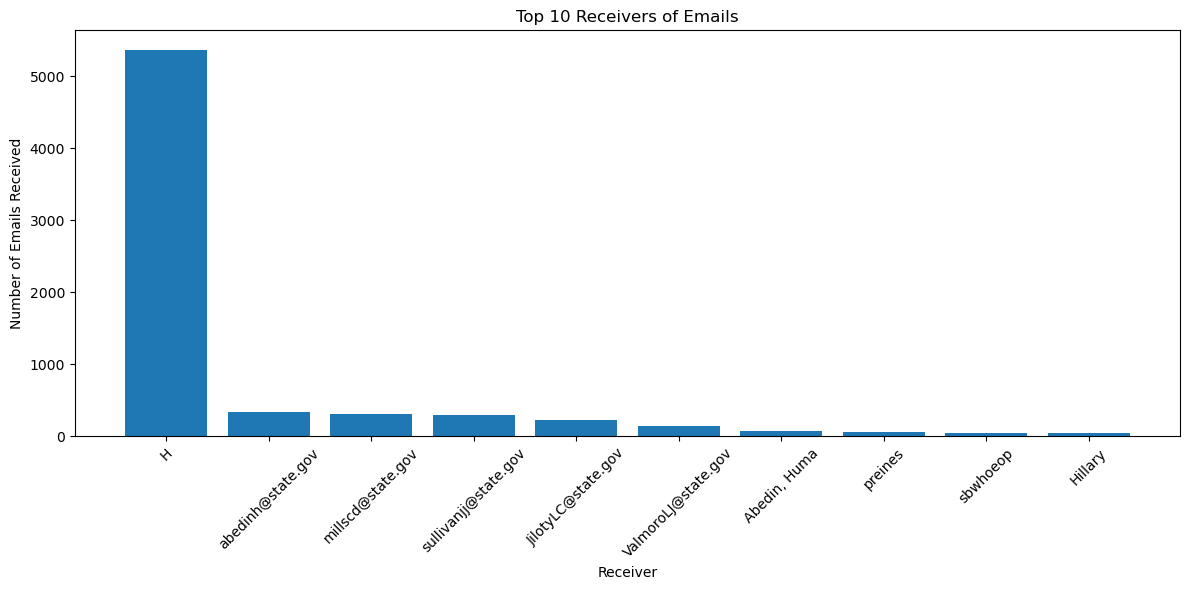

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
emails = pd.read_csv("Emails.csv")

# Get the count of emails sent by each sender
senders_counts = emails.groupby('MetadataFrom').size().reset_index(name='EmailsSent')
# Get the count of emails received by each receiver
receivers_counts = emails.groupby('MetadataTo').size().reset_index(name='EmailsReceived')

# Fill missing values with 0
senders_counts = senders_counts.fillna(0)
receivers_counts = receivers_counts.fillna(0)

# Sort the data by the total count
senders_counts = senders_counts.sort_values(by='EmailsSent', ascending=False)
receivers_counts = receivers_counts.sort_values(by='EmailsReceived', ascending=False)

# Get the top 10 senders and receivers
top_senders = senders_counts.head(10)
top_receivers = receivers_counts.head(10)

# Plot for senders
plt.figure(figsize=(12, 6))
plt.bar(top_senders['MetadataFrom'], top_senders['EmailsSent'])
plt.xlabel('Sender')
plt.ylabel('Number of Emails Sent')
plt.title('Top 10 Senders of Emails')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for receivers
plt.figure(figsize=(12, 6))
plt.bar(top_receivers['MetadataTo'], top_receivers['EmailsReceived'])
plt.xlabel('Receiver')
plt.ylabel('Number of Emails Received')
plt.title('Top 10 Receivers of Emails')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
